In [1]:
#Import required library

import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Import prisoners data
URL_DATA = 'https://storage.data.gov.my/publicsafety/prisoners_state.parquet'

df = pd.read_parquet(URL_DATA)
if 'date' in df.columns: df['date'] = pd.to_datetime(df['date'])

prisoners = df

prisoners.head(6)

,date,state,sex,prisoners
0,2017-01-01,Malaysia,both,120048
1,2018-01-01,Malaysia,both,115488
2,2019-01-01,Malaysia,both,136145
3,2020-01-01,Malaysia,both,100053
4,2021-01-01,Malaysia,both,82269
5,2022-01-01,Malaysia,both,101809


In [3]:
# Import population data
import pandas as pd

URL_DATA = 'https://storage.dosm.gov.my/population/population_state.parquet'

df = pd.read_parquet(URL_DATA)
if 'date' in df.columns: df['date'] = pd.to_datetime(df['date'])

population = df

population.head(5)

,state,date,sex,age,ethnicity,population
0,Johor,1970-01-01,both,overall,overall,1325.6
1,Johor,1970-01-01,both,0-4,overall,210.1
2,Johor,1970-01-01,both,5-9,overall,215.7
3,Johor,1970-01-01,both,10-14,overall,192.2
4,Johor,1970-01-01,both,15-19,overall,152.8


In [4]:
# Cleaning & EDA Prisoners Data

print(prisoners.info())
print(prisoners['state'].value_counts())
print(prisoners['sex'].value_counts())
prisoners.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       234 non-null    datetime64[ns]
 1   state      234 non-null    object        
 2   sex        234 non-null    object        
 3   prisoners  234 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 7.4+ KB
None
state
Malaysia           18
Johor              18
Kedah              18
Kelantan           18
Melaka             18
Negeri Sembilan    18
Pahang             18
Perak              18
Pulau Pinang       18
Sabah              18
Sarawak            18
Selangor           18
Terengganu         18
Name: count, dtype: int64
sex
both      78
female    78
male      78
Name: count, dtype: int64


,date,state,sex,prisoners
count,234,234,234,234.000000
unique,NaN,13,3,NaN
top,NaN,Malaysia,both,NaN
freq,NaN,18,78,NaN
mean,2019-07-02 20:00:00,NaN,NaN,11210.461538
min,2017-01-01 00:00:00,NaN,NaN,0.000000
25%,2018-01-01 00:00:00,NaN,NaN,1037.500000
50%,2019-07-02 12:00:00,NaN,NaN,5452.000000
75%,2021-01-01 00:00:00,NaN,NaN,7972.750000
max,2022-01-01 00:00:00,NaN,NaN,136145.000000


In [5]:
prisoners['state'].value_counts()

state
Malaysia           18
Johor              18
Kedah              18
Kelantan           18
Melaka             18
Negeri Sembilan    18
Pahang             18
Perak              18
Pulau Pinang       18
Sabah              18
Sarawak            18
Selangor           18
Terengganu         18
Name: count, dtype: int64

In [6]:
prisoners = prisoners[prisoners['state']!='Malaysia']
prisoners = prisoners[prisoners['sex']!='both']
prisoners

,date,state,sex,prisoners
24,2017-01-01,Johor,female,1792
25,2018-01-01,Johor,female,1963
26,2019-01-01,Johor,female,1949
27,2020-01-01,Johor,female,1366
28,2021-01-01,Johor,female,722
...,...,...,...,...
229,2018-01-01,Terengganu,male,4967
230,2019-01-01,Terengganu,male,5127
231,2020-01-01,Terengganu,male,4536
232,2021-01-01,Terengganu,male,4044


In [7]:
# Cleaning & EDA Population Data

prisoners['state'].unique().shape[0]

12

In [8]:
# If not already installed, do: pip install pandas fastparquet

URL_DATA = 'https://storage.data.gov.my/publicsafety/prisoners_prison.parquet'

df = pd.read_parquet(URL_DATA)
if 'date' in df.columns: df['date'] = pd.to_datetime(df['date'])

prisons = df

prisons

,date,state,prison,sex,prisoners
0,2017-01-01,Johor,Penjara Kluang,both,10003
1,2018-01-01,Johor,Penjara Kluang,both,1070
2,2019-01-01,Johor,Penjara Kluang,both,2138
3,2020-01-01,Johor,Penjara Kluang,both,10802
4,2021-01-01,Johor,Penjara Kluang,both,7486
...,...,...,...,...,...
643,2018-01-01,Terengganu,Pusat Koreksional Dungun,male,1249
644,2019-01-01,Terengganu,Pusat Koreksional Dungun,male,1166
645,2020-01-01,Terengganu,Pusat Koreksional Dungun,male,758
646,2021-01-01,Terengganu,Pusat Koreksional Dungun,male,1101


In [9]:
state_set_prisoners = set(prisoners['state'].unique().flatten())
state_set_population = set(population['state'].unique().flatten())
state_set_prisons = set(prisons['state'].unique().flatten())

print(state_set_prisoners ^ state_set_population)
print(state_set_prisons ^ state_set_population)



{'W.P. Putrajaya', 'W.P. Labuan', 'W.P. Kuala Lumpur', 'Perlis'}
{'W.P. Putrajaya', 'W.P. Labuan', 'W.P. Kuala Lumpur', 'Perlis'}


In [10]:
prisons_set = set(prisons['prison'].unique().flatten())

# Check whether prisons in missing places are in the prison column

# List of prisons serving Perlis and the three Federal Territories
prisons_missing_set = {
    "Pusat Koreksional Perlis",
    "Penjara Kajang",
    "Penjara Sungai Buloh",
    "Pusat Koreksional Labuan"
    # Putrajaya doesn't have a dedicated prison, so no entry for Putrajaya
}

print(prisons_missing_set & prisons_set)
print(prisons_set)

#Confirmed missing

#Note on missing prisons data

# Penjara Kajang & Sungai Buloh is placed under Selangor state columns but also serving WP Putrajaya & KL.
# Pusat Koreksional Labuan, placed in Labuan is placed under Sararawak
# Pusat Koreksional Perlis is notably missing, as such there's no data on the prisoners in Perlis provided by Jabatan Penjara Negara

{'Penjara Sungai Buloh', 'Penjara Kajang', 'Pusat Koreksional Labuan'}
{'Penjara Sungai Udang', 'Pusat Koreksional Dungun', 'Penjara Simpang Renggam', 'Penjara Sandakan', 'Pusat Koreksional Labuan', 'Pusat Koreksional Bintulu', 'Penjara Taiping', 'Penjara Tapah', 'Pusat Koreksional Jasin', 'Penjara Seberang Perai', 'Penjara Alor Setar', 'Penjara Sungai Buloh', 'Penjara Kajang', 'Penjara Sri Aman', 'Penjara Kluang', 'Penjara Puncak Borneo', 'Penjara Seremban', 'Penjara Pokok Sena', 'Penjara Miri', 'Pusat Koreksional Johor Bahru', 'Penjara Kota Kinabalu', 'Penjara Penor', 'Penjara Pra Bebas Dusun Dato Murad', 'Penjara Marang', 'Penjara Pengkalan Chepa', 'Pusat Koreksional Puncak Alam', 'Pusat Koreksional Kamunting', 'Pusat Koreksional Machang', 'Penjara Sungai Petani', 'Penjara Bentong', 'Penjara Tawau', 'Penjara Sibu', 'Penjara Limbang', 'Penjara Reman Pulau Pinang', 'Institut Pemulihan Dadah Jelebu', 'Pusat Koreksional Muar'}


In [11]:
#Set year column
prisoners['year'] = prisoners['date'].dt.year

In [12]:
#both sex
prisoners_bsex = prisoners.groupby(['year','state']).agg(sum_prisoners = ('prisoners','sum')).reset_index()
prisoners_bsex

,year,state,sum_prisoners
0,2017,Johor,11589
1,2017,Kedah,7045
2,2017,Kelantan,7066
3,2017,Melaka,6000
4,2017,Negeri Sembilan,5115
...,...,...,...
67,2022,Pulau Pinang,6699
68,2022,Sabah,8412
69,2022,Sarawak,6089
70,2022,Selangor,27765


In [13]:
#Get ratio for M:F for all states
prisoners = prisoners.merge(prisoners_bsex,how='left',on=['year','state'])
prisoners.insert(4,'sex_ratio',round((prisoners['prisoners']/prisoners['sum_prisoners']),2))
prisoners = prisoners.drop(columns='sum_prisoners')
prisoners

,date,state,sex,prisoners,sex_ratio,year
0,2017-01-01,Johor,female,1792,0.15,2017
1,2018-01-01,Johor,female,1963,0.16,2018
2,2019-01-01,Johor,female,1949,0.14,2019
3,2020-01-01,Johor,female,1366,0.11,2020
4,2021-01-01,Johor,female,722,0.08,2021
...,...,...,...,...,...,...
139,2018-01-01,Terengganu,male,4967,1.00,2018
140,2019-01-01,Terengganu,male,5127,1.00,2019
141,2020-01-01,Terengganu,male,4536,1.00,2020
142,2021-01-01,Terengganu,male,4044,0.99,2021


In [71]:
#Get latest available data 2022
prisoners_2022 = prisoners[prisoners['year']==2022]
prisoners_2022

,date,state,sex,prisoners,sex_ratio,year
5,2022-01-01,Johor,female,565,0.07,2022
11,2022-01-01,Johor,male,8070,0.93,2022
17,2022-01-01,Kedah,female,750,0.08,2022
23,2022-01-01,Kedah,male,8230,0.92,2022
29,2022-01-01,Kelantan,female,699,0.09,2022
35,2022-01-01,Kelantan,male,7287,0.91,2022
41,2022-01-01,Melaka,female,647,0.12,2022
47,2022-01-01,Melaka,male,4634,0.88,2022
53,2022-01-01,Negeri Sembilan,female,0,0.00,2022
59,2022-01-01,Negeri Sembilan,male,2722,1.00,2022


In [93]:
prisoners_2022[prisoners_2022['sex']=='male'].sort_values('prisoners')

,date,state,sex,prisoners,sex_ratio,year
59,2022-01-01,Negeri Sembilan,male,2722,1.00,2022
47,2022-01-01,Melaka,male,4634,0.88,2022
143,2022-01-01,Terengganu,male,4987,1.00,2022
71,2022-01-01,Pahang,male,5432,0.91,2022
119,2022-01-01,Sarawak,male,5464,0.90,2022
95,2022-01-01,Pulau Pinang,male,6237,0.93,2022
35,2022-01-01,Kelantan,male,7287,0.91,2022
83,2022-01-01,Perak,male,7721,0.93,2022
107,2022-01-01,Sabah,male,7776,0.92,2022
11,2022-01-01,Johor,male,8070,0.93,2022


In [16]:
#Filter for year 2022, and group prisoners by state

prisoners_adj_2022 = prisoners[prisoners['year'] == 2022].groupby('state').agg(sum_prisoners = ('prisoners','sum'),
                                        sex_ratio_m = ('sex_ratio','max')).sort_values(by=['sum_prisoners'],ascending=False).reset_index()
prisoners_adj_2022

,state,sum_prisoners,sex_ratio_m
0,Selangor,27765,0.89
1,Kedah,8980,0.92
2,Johor,8635,0.93
3,Sabah,8412,0.92
4,Perak,8276,0.93
5,Kelantan,7986,0.91
6,Pulau Pinang,6699,0.93
7,Sarawak,6089,0.90
8,Pahang,5977,0.91
9,Melaka,5281,0.88


In [17]:
#put year column in population df
population['year'] = population['date'].dt.year

# Since, there's no data for Perlis column. Drop Perlis

population_adj = population.copy()
population_adj = population_adj[population_adj['state']!='Perlis']

# There's no WP columns in prisons data. KL & Putraya will be placed under Selangor whist Labuan placed under Sarawak
population_adj['state'] = population_adj['state'].replace({'W.P. Kuala Lumpur':'Selangor','W.P. Putrajaya':'Selangor','W.P. Labuan':'Sarawak'})

#Check whether the data is adjusted
print(population_adj['state'].value_counts())
population_adj

state
Selangor           39537
Sarawak            30582
Johor              17016
Kedah              17016
Kelantan           17016
Melaka             17016
Negeri Sembilan    17016
Pahang             17016
Perak              17016
Pulau Pinang       17016
Sabah              17016
Terengganu         17016
Name: count, dtype: int64


,state,date,sex,age,ethnicity,population,year
0,Johor,1970-01-01,both,overall,overall,1325.6,1970
1,Johor,1970-01-01,both,0-4,overall,210.1,1970
2,Johor,1970-01-01,both,5-9,overall,215.7,1970
3,Johor,1970-01-01,both,10-14,overall,192.2,1970
4,Johor,1970-01-01,both,15-19,overall,152.8,1970
...,...,...,...,...,...,...,...
257290,Selangor,2024-01-01,male,85+,bumi_other,0.0,2024
257291,Selangor,2024-01-01,male,85+,chinese,0.0,2024
257292,Selangor,2024-01-01,male,85+,indian,0.0,2024
257293,Selangor,2024-01-01,male,85+,other_citizen,0.0,2024


In [105]:
#filter for 2022 and select all for sex, age, ethinicity
population_adj_22 = population_adj[(population_adj['year']==2022) & (population_adj['sex']=='both') & (population_adj['ethnicity']=='overall') & (population_adj['age'] == 'overall')]
population_adj_22 = population_adj_22.groupby('state').agg(population = ('population','sum')).sort_values(by='population',ascending=False).reset_index()
population_adj_22

merged = prisoners_adj_2022.merge(population_adj_22[['state','population']],on='state',how='left')
merged['inc_rate_per_100k'] = merged['sum_prisoners']/((merged['population']*1000)/100000)
merged = merged.sort_values(by='inc_rate_per_100k')
merged

,state,sum_prisoners,sex_ratio_m,population,inc_rate_per_100k
2,Johor,8635,0.93,4028.3,214.358414
11,Negeri Sembilan,2722,1.00,1207.9,225.349781
7,Sarawak,6089,0.90,2570.4,236.889200
3,Sabah,8412,0.92,3414.9,246.332250
0,Selangor,27765,0.89,9128.5,304.157310
4,Perak,8276,0.93,2514.4,329.144130
8,Pahang,5977,0.91,1614.3,370.253361
6,Pulau Pinang,6699,0.93,1740.9,384.800965
1,Kedah,8980,0.92,2163.1,415.144931
10,Terengganu,4987,1.00,1186.6,420.276420


In [136]:
state_order = list(merged['state'])
state_order

['Johor',
 'Negeri Sembilan',
 'Sarawak',
 'Sabah',
 'Selangor',
 'Perak',
 'Pahang',
 'Pulau Pinang',
 'Kedah',
 'Terengganu',
 'Kelantan',
 'Melaka']

In [ ]:
# Filter and assign to a temporary DataFrame for clarity
temp_df = prisoners_2022[prisoners_2022['sex'] == 'male']

# Convert 'state' column to categorical type to reflect the order in 'state_order'
temp_df['state'] = pd.Categorical(temp_df['state'], categories=state_order, ordered=True)
sorted_prisoners_2022 = temp_df.sort_values(by='state')
sorted_prisoners_2022

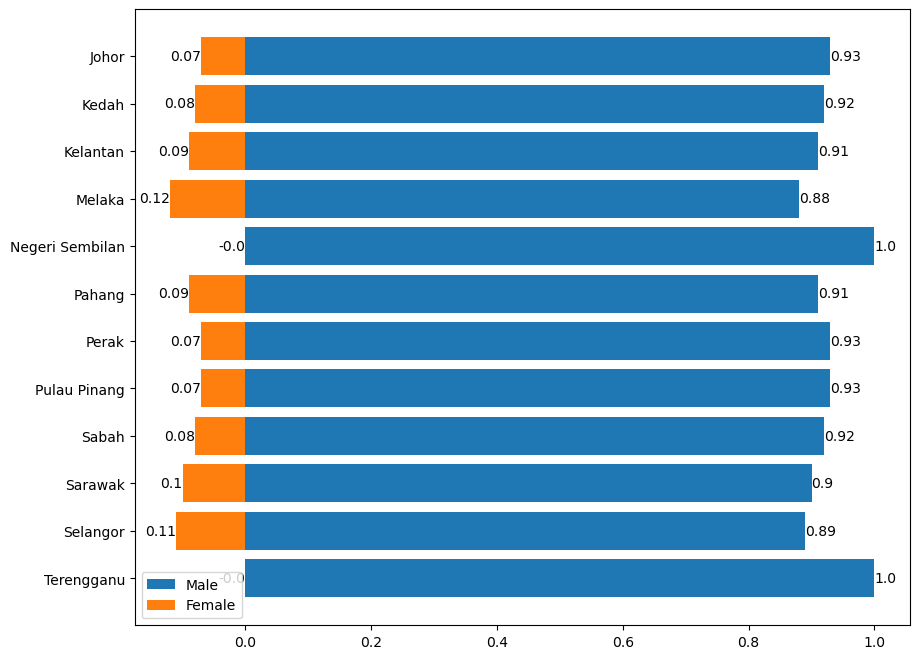

In [122]:
#butterfly chart using plotly

#merged_state_list = list(merged['state'])
#prisoners_2022 = prisoners_2022.sort_values(by=merged_state_list)


fig,ax = plt.subplots(figsize=(10,8))

bars_right = ax.barh(prisoners_2022[prisoners_2022['sex']=='male']['state'],
                     prisoners_2022[prisoners_2022['sex']=='male']['sex_ratio'],
                     label='Male',align='center'
                    )

bars_left = ax.barh(prisoners_2022[prisoners_2022['sex']=='female']['state'],
                     -prisoners_2022[prisoners_2022['sex']=='female']['sex_ratio'],
                     label='Female',align='center'
                    )

#Get value for each bar
for bar in bars_right:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2, f'{width}',ha='left',va='center')

for bar in bars_left:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2, f'{-width}',ha='right',va='center')

plt.legend()
plt.gca().invert_yaxis()
plt.show()

In [19]:
#sum isn't accurate because 
sum_pop_22 = (population_adj_22['population'].sum()*1000)
sum_pop_22/1000000

32.4085

In [20]:
sum_prisoners_22 = prisoners_adj_2022['sum_prisoners'].sum()
sum_prisoners_22

101809

In [21]:
sum_prisoners_22/(sum_pop_22/100000)

314.1428946109817

In [22]:
prisoners['sex'].value_counts()

sex
female    72
male      72
Name: count, dtype: int64

In [23]:
#validation
prisoners_yearly = prisoners[(prisoners['sex']=='both') & (prisoners['state']=='Malaysia')]
prisoners_yearly

,date,state,sex,prisoners,sex_ratio,year


In [24]:
#validation
pop_all_2022 = population[(population['year']==2022) & (population['sex']=='both') & (population['age']=='overall') & (population['ethnicity']=='overall')]
pop_all_2022.groupby('year').sum(numeric_only=True).reset_index()['population']

0    32698.3
Name: population, dtype: float64

In [25]:
# If not already installed, do: pip install pandas fastparquet

URL_DATA = 'https://storage.dosm.gov.my/population/population_malaysia.parquet'

df = pd.read_parquet(URL_DATA)
if 'date' in df.columns: df['date'] = pd.to_datetime(df['date'])

pops = df
pops['year'] = pops['date'].dt.year
pops

,date,sex,age,ethnicity,population,year
0,1970-01-01,both,overall,overall,10881.8,1970
1,1970-01-01,both,0-4,overall,1702.4,1970
2,1970-01-01,both,5-9,overall,1690.3,1970
3,1970-01-01,both,10-14,overall,1454.7,1970
4,1970-01-01,both,15-19,overall,1197.6,1970
...,...,...,...,...,...,...
17011,2024-01-01,male,85+,bumi_other,10.0,2024
17012,2024-01-01,male,85+,chinese,14.9,2024
17013,2024-01-01,male,85+,indian,4.4,2024
17014,2024-01-01,male,85+,other_citizen,0.6,2024


In [26]:
pops['year'] = pops['date'].dt.year
pops_sub = pops[(pops['year'] == 2022) & (pops['sex'] == 'both') & (pops['age'] == 'overall') & (pops['ethnicity'] == 'overall')]
pops_sub

,date,sex,age,ethnicity,population,year
15819,2022-01-01,both,overall,overall,32698.1,2022


In [27]:
pops_2022 = pops_sub.loc[15819,'population']
pops_2022 = pops_2022*1000
pops_2022

32698100.0

In [60]:
sum_prisoners_22/(pops_2022/100000)

311.360598933883

# Note:

Malaysia'incarceration rate prisoners/100k population is 311